In [7]:
import seaborn as sns


In [9]:
import pandas as pd

In [2]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from C:\Users\Preetam Jain\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\PREETA~1\AppData\Local\Temp\tmpj_nkia_k
  JVM stdout: C:\Users\PREETA~1\AppData\Local\Temp\tmpj_nkia_k\h2o_Preetam_Jain_started_from_python.out
  JVM stderr: C:\Users\PREETA~1\AppData\Local\Temp\tmpj_nkia_k\h2o_Preetam_Jain_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_Preetam_Jain_ree58f
H2O cluster total nodes:,1
H2O cluster free memory:,1.749 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [22]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("data.csv")
#test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
train.describe()

Rows:30697
Cols:25




,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
type,enum,enum,int,int,real,int,int,real,int,int,int,time,int,int,int,enum,enum,enum,enum,int,enum,time,enum,enum,int
mins,,,2.0,20000012.0,33.2533,-250.0,-44.0,-118.5198,0.0,1.0,0.0,946684800000.0,0.0,0.0,0.0,,,,,1610612747.0,,846979200000.0,,,1.0
mean,,,249.1908004039482,24764065.868065283,33.953192465061726,7.1104993973352455,91.10753493826758,-118.26268950060266,4.885624002345506,2.519431866306155,0.14656155324624556,1134377582238.286,28.365084535948135,13.437436883083038,0.44616103047048294,,,,,1610612747.0,,1152399729589.2107,,,15349.0
maxs,,,659.0,49900088.0,34.0883,248.0,791.0,-118.0218,11.0,7.0,1.0,1322697600000.0,59.0,79.0,1.0,,,,,1610612747.0,,1460505600000.0,,,30697.0
sigma,,,150.0037119992915,7755174.8901978675,0.08779136122006989,110.12457809032195,87.7913612200687,0.11012457809032283,3.44989747778871,1.1536654891460685,0.3536740578491761,116549116659.58641,17.478949230366613,9.37418938817458,0.49710258669194707,,,,,0.0,,152824418170.10196,,,8861.604943048786
zeros,,,0,0,0,5475,5599,0,3866,0,26198,0,985,5542,14232,,,,,0,,0,,,0
missing,0,0,0,0,0,0,0,0,0,0,0,7456,0,0,5000,0,0,0,0,0,0,0,0,0,0
0,Jump Shot,Jump Shot,10.0,20000012.0,33.9723,167.0,72.0,-118.1028,10.0,1.0,0.0,2000-01-01 00:00:00,27.0,18.0,nan,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747.0,Los Angeles Lakers,2000-10-31 00:00:00,LAL @ POR,POR,1.0
1,Jump Shot,Jump Shot,12.0,20000012.0,34.0443,-157.0,0.0,-118.4268,10.0,1.0,0.0,2000-01-01 00:00:00,22.0,15.0,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747.0,Los Angeles Lakers,2000-10-31 00:00:00,LAL @ POR,POR,2.0
2,Jump Shot,Jump Shot,35.0,20000012.0,33.9093,-101.0,135.0,-118.3708,7.0,1.0,0.0,2000-01-01 00:00:00,45.0,16.0,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747.0,Los Angeles Lakers,2000-10-31 00:00:00,LAL @ POR,POR,3.0


In [23]:
train.cor()

action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,1,-0.00255269,-0.0600907,-0.0284041,0.0600907,-0.0284041,-0.270736,0.956042,-0.00450748,nan,-0.0212925,0.0620774,nan,0.111674,nan,nan,nan,nan,nan,0.0373521,nan,nan,0.0284783
nan,nan,-0.00255269,1,0.0130206,-0.0195529,-0.0130206,-0.0195529,0.0144808,0.00987879,0.917235,nan,-0.0071072,-0.030327,nan,-0.0172613,nan,nan,nan,nan,nan,-0.24724,nan,nan,0.761656
nan,nan,-0.0600907,0.0130206,1,0.0162166,-1,0.0162166,0.0714616,-0.0412475,-0.0011428,nan,0.0527142,-0.818517,nan,-0.606792,nan,nan,nan,nan,nan,-0.0988384,nan,nan,-0.0307899
nan,nan,-0.0284041,-0.0195529,0.0162166,1,-0.0162166,1,0.00689823,-0.028165,-0.01279,nan,0.00108261,0.0226542,nan,-0.00524916,nan,nan,nan,nan,nan,0.00651426,nan,nan,-0.0199169
nan,nan,0.0600907,-0.0130206,-1,-0.0162166,1,-0.0162166,-0.0714616,0.0412475,0.0011428,nan,-0.0527142,0.818517,nan,0.606792,nan,nan,nan,nan,nan,0.0988384,nan,nan,0.0307899
nan,nan,-0.0284041,-0.0195529,0.0162166,1,-0.0162166,1,0.00689823,-0.028165,-0.01279,nan,0.00108261,0.0226542,nan,-0.00524916,nan,nan,nan,nan,nan,0.00651426,nan,nan,-0.0199169
nan,nan,-0.270736,0.0144808,0.0714616,0.00689823,-0.0714616,0.00689823,1,-0.043425,0.0151008,nan,0.0255576,-0.059767,nan,-0.11603,nan,nan,nan,nan,nan,-0.0253216,nan,nan,-0.00573104
nan,nan,0.956042,0.00987879,-0.0412475,-0.028165,0.0412475,-0.028165,-0.043425,1,0.00878877,nan,0.00583173,0.0469928,nan,0.082397,nan,nan,nan,nan,nan,-0.0205369,nan,nan,0.000363612


In [16]:
from matplotlib.pyplot import figure
import matplotlib as plt

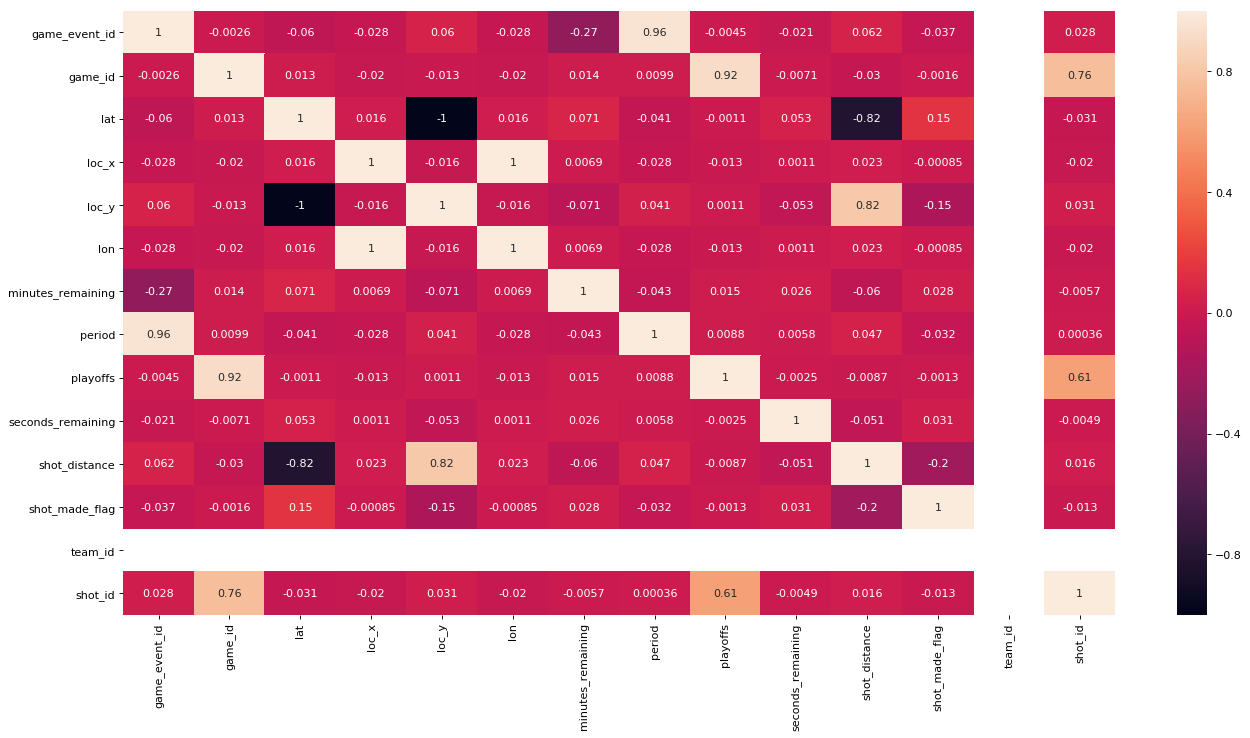

In [19]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
df=pd.read_csv("data.csv")
sns.heatmap(df.corr(), annot = True)

In [24]:
# Identify predictors and response
x = train.columns
y = "shot_made_flag"
x.remove(y)

In [25]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
#test[y] = test[y].asfactor()

In [30]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1, max_runtime_secs=3600)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [32]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20190206_142201,0.706839,0.601966,0.427682,0.45586,0.207808
StackedEnsemble_BestOfFamily_AutoML_20190206_142201,0.705018,0.60332,0.428414,0.456408,0.208308
GBM_grid_1_AutoML_20190206_142201_model_2,0.703184,0.616292,0.426515,0.461759,0.213222
GBM_grid_1_AutoML_20190206_145736_model_2,0.703184,0.616292,0.426515,0.461759,0.213222
GBM_grid_1_AutoML_20190206_145736_model_1,0.703148,0.615221,0.406872,0.461352,0.212846
GBM_grid_1_AutoML_20190206_142201_model_1,0.703148,0.615221,0.406872,0.461352,0.212846
GBM_1_AutoML_20190206_142201,0.701896,0.604455,0.43127,0.457262,0.209088
GBM_1_AutoML_20190206_145736,0.701896,0.604455,0.43127,0.457262,0.209088
GBM_5_AutoML_20190206_142201,0.701628,0.606504,0.412601,0.458279,0.21002
GBM_5_AutoML_20190206_145736,0.701628,0.606504,0.412601,0.458279,0.21002


In [33]:
# The leader model is stored here
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190206_142201
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.18475113024308598
RMSE: 0.42982686077429594
LogLoss: 0.5485460187165289
Null degrees of freedom: 25696
Residual degrees of freedom: 25687
Null deviance: 35325.08289784391
Residual deviance: 28191.97408591728
AIC: 28211.97408591728
AUC: 0.8079429089486369
pr_auc: 0.7874509633800846
Gini: 0.6158858178972737
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3567846561746536: 


,0,1,Error,Rate
0,8721.0,5511.0,0.3872,(5511.0/14232.0)
1,2006.0,9459.0,0.175,(2006.0/11465.0)
Total,10727.0,14970.0,0.2925,(7517.0/25697.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3567847,0.7156421,265.0
max f2,0.2803006,0.8229713,325.0
max f0point5,0.4047425,0.7008550,226.0
max accuracy,0.3980349,0.7291123,231.0
max precision,0.9239235,1.0,0.0
max recall,0.1674644,1.0,384.0
max specificity,0.9239235,1.0,0.0
max absolute_mcc,0.3906566,0.4509432,237.0
max min_per_class_accuracy,0.3842397,0.7256886,242.0
max mean_per_class_accuracy,0.3856160,0.7261142,241.0


Gains/Lift Table: Avg response rate: 44.62 %, avg score: 45.03 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103514,0.9192352,2.2413432,2.2413432,1.0,0.9211702,1.0,0.9211702,0.0232010,0.0232010,124.1343218,124.1343218
,2,0.0205082,0.9150278,2.2413432,2.2413432,1.0,0.9173653,1.0,0.9192858,0.0227649,0.0459660,124.1343218,124.1343218
,3,0.0295365,0.9036557,2.2123603,2.2324842,0.9870690,0.9111078,0.9960474,0.9167860,0.0199738,0.0659398,121.2360332,123.2484154
,4,0.0396933,0.8716429,2.1382930,2.2083823,0.9540230,0.8851745,0.9852941,0.9086972,0.0217183,0.0876581,113.8292956,120.8382289
,5,0.0502782,0.8552537,2.2001421,2.2066475,0.9816176,0.8630836,0.9845201,0.8990943,0.0232883,0.1109464,120.0142056,120.6647503
,6,0.1004397,0.7985032,2.1370138,2.1718711,0.9534523,0.8271511,0.9690043,0.8631645,0.1071958,0.2181422,113.7013821,117.1871131
,7,0.1500564,0.7401974,1.8827283,2.0762650,0.84,0.7701898,0.9263485,0.8324221,0.0934147,0.3115569,88.2728304,107.6265035
,8,0.1978830,0.6655159,1.5483323,1.9486683,0.6908055,0.7054802,0.8694199,0.8017414,0.0740515,0.3856084,54.8332297,94.8668312
,9,0.2992567,0.4679045,1.2019795,1.6957262,0.5362764,0.5619127,0.7565670,0.7204990,0.1218491,0.5074575,20.1979453,69.5726248
,10,0.3989960,0.4071120,1.3353613,1.6056438,0.5957862,0.4314910,0.7163757,0.6482541,0.1331880,0.6406454,33.5361332,60.5643806




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.2078084881170427
RMSE: 0.4558601628976179
LogLoss: 0.6019664424510794
Null degrees of freedom: 25696
Residual degrees of freedom: 25686
Null deviance: 35892.66033397885
Residual deviance: 30937.463343330775
AIC: 30959.463343330775
AUC: 0.7068391666403138
pr_auc: 0.6999789684111374
Gini: 0.41367833328062753
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29135835020921863: 


,0,1,Error,Rate
0,3522.0,10710.0,0.7525,(10710.0/14232.0)
1,1179.0,10286.0,0.1028,(1179.0/11465.0)
Total,4701.0,20996.0,0.4627,(11889.0/25697.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2913584,0.6337451,318.0
max f2,0.1919978,0.8024639,378.0
max f0point5,0.5501791,0.6572278,157.0
max accuracy,0.5183950,0.6845157,170.0
max precision,0.9012890,0.9707447,12.0
max recall,0.1183690,1.0,394.0
max specificity,0.9269465,0.9999297,0.0
max absolute_mcc,0.5583480,0.3647518,153.0
max min_per_class_accuracy,0.3702880,0.6384649,252.0
max mean_per_class_accuracy,0.4719987,0.6622198,189.0


Gains/Lift Table: Avg response rate: 44.62 %, avg score: 44.61 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101179,0.9173955,2.1637583,2.1637583,0.9653846,0.9209229,0.9653846,0.9209229,0.0218927,0.0218927,116.3758261,116.3758261
,2,0.0200023,0.9116786,2.1619255,2.1628526,0.9645669,0.9146960,0.9649805,0.9178458,0.0213694,0.0432621,116.1925545,116.2852600
,3,0.0293419,0.8995471,2.1853096,2.1700007,0.975,0.9069565,0.9681698,0.9143797,0.0204099,0.0636720,118.5309638,117.0000729
,4,0.0395377,0.8691819,1.9932556,2.1244228,0.8893130,0.8822762,0.9478346,0.9061011,0.0203227,0.0839948,99.3255610,112.4422755
,5,0.0494999,0.8512156,1.9874411,2.0968541,0.8867188,0.8593677,0.9355346,0.8966956,0.0197994,0.1037942,98.7441057,109.6854112
,6,0.1000117,0.7977830,1.8752687,1.9849405,0.8366718,0.8233133,0.8856031,0.8596332,0.0947231,0.1985172,87.5268671,98.4940531
,7,0.1489668,0.7427548,1.7014966,1.8917920,0.7591415,0.7709256,0.8440439,0.8304812,0.0832970,0.2818142,70.1496640,89.1792043
,8,0.1982333,0.6708744,1.5101625,1.7969465,0.6737757,0.7085638,0.8017275,0.8001813,0.0744003,0.3562146,51.0162532,79.6946546
,9,0.2988676,0.4606692,1.2030102,1.5969570,0.5367363,0.5646125,0.7125,0.7208609,0.1210641,0.4772787,20.3010204,59.6957043
,10,0.3972059,0.3963867,0.9011495,1.4246923,0.4020578,0.4216040,0.6356422,0.6467723,0.0886175,0.5658962,-9.8850530,42.4692349
